# Heart Disease Prediction

In [599]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler,OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,classification_report
import warnings

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier



#### EDA

In [600]:
df=pd.read_csv('heart.csv')

In [601]:
df.head(3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0


In [602]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [603]:
df.duplicated().sum()

0

In [604]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [605]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [606]:
df.describe(include='object')

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [607]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [608]:
df['Sex'].value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

In [609]:
round(df['HeartDisease'].value_counts(normalize=True)*100,2)

HeartDisease
1    55.34
0    44.66
Name: proportion, dtype: float64

#### Normal Distribution check

In [ ]:
for col in df.columns:
    sns.plot(x=df[col],y=df['HeartDisease'])

#### Outlier Detection

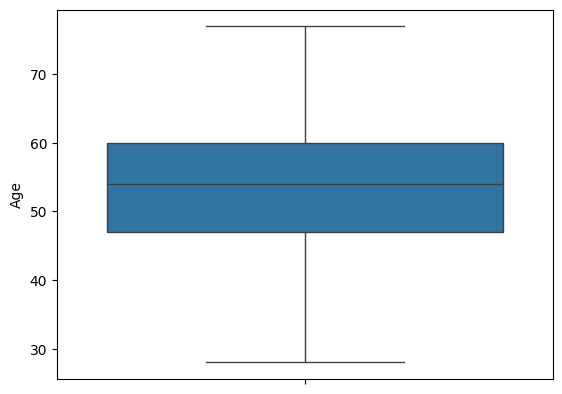

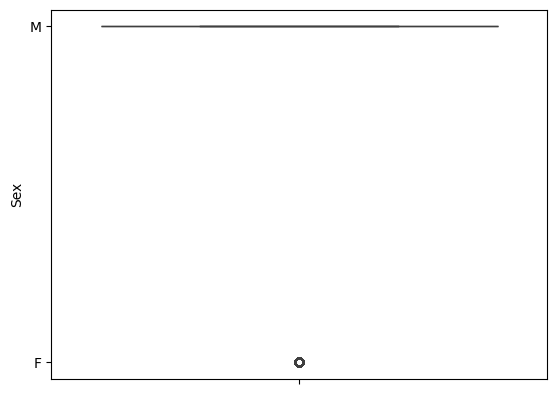

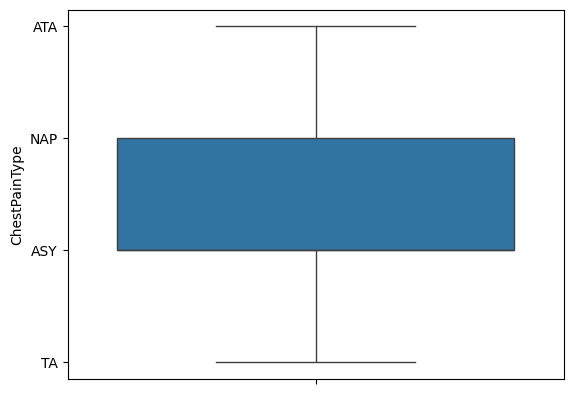

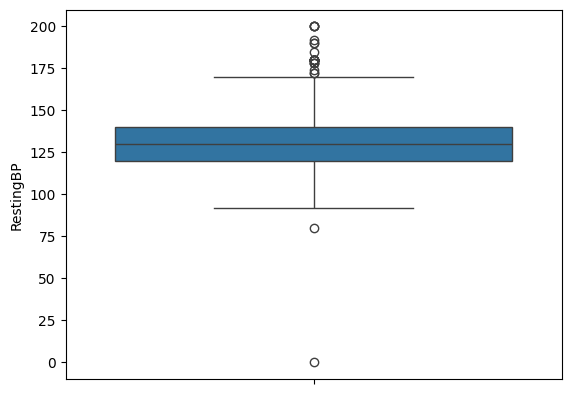

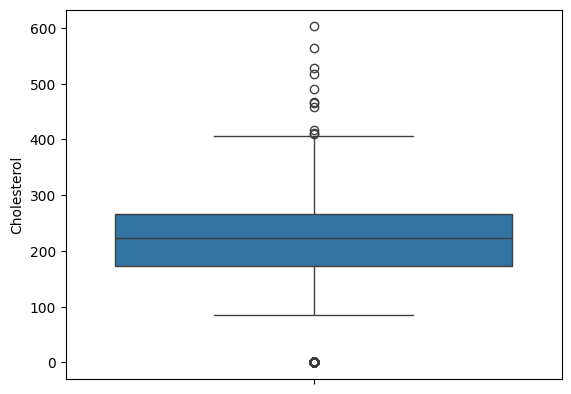

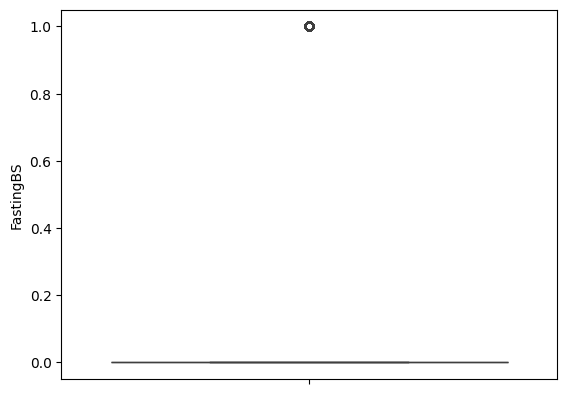

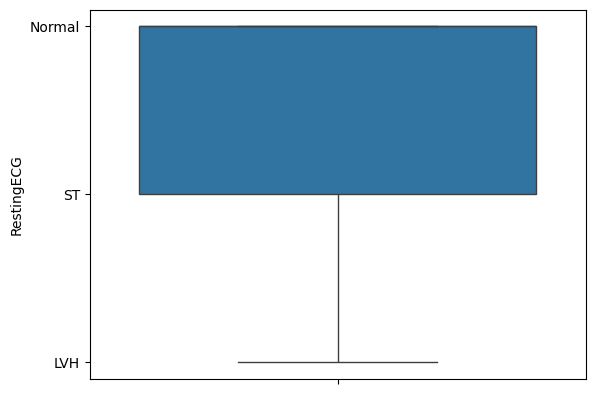

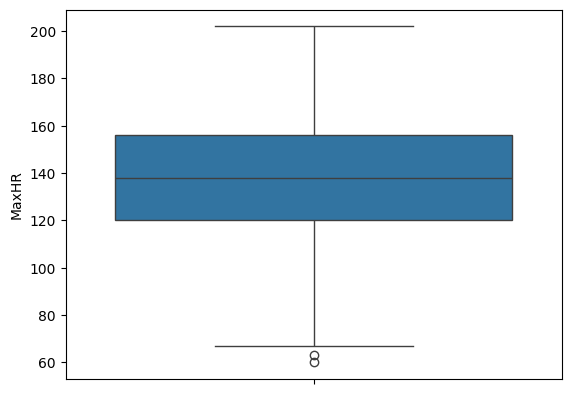

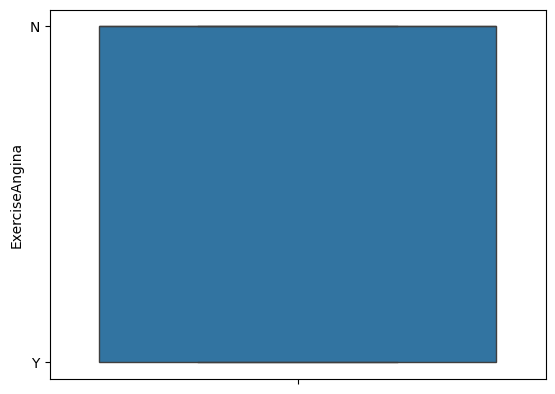

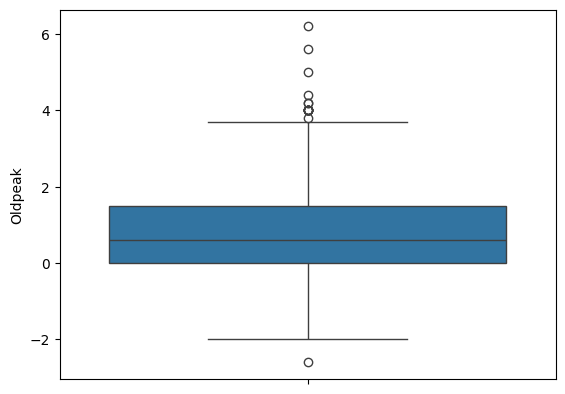

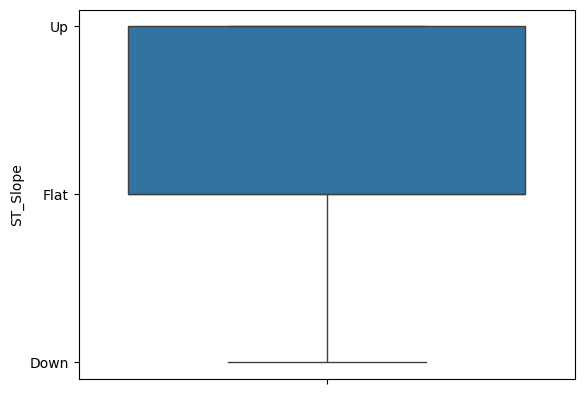

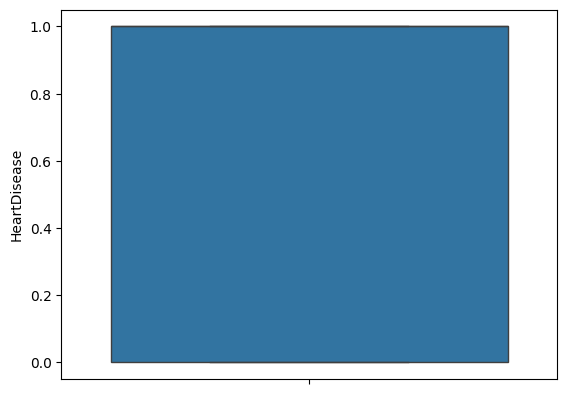

In [610]:
for col in df.columns:
    sns.boxplot(y=df[col])
    plt.show()

In [ ]:
cols=df['RestingBP','Cholesterol']
df['Cholesterol']

#### Encoding

In [611]:
one_hot_cols=['ChestPainType','RestingECG']
ordinal_col=['ST_Slope']
ordinal_mapping=[['Down','Flat','Up']]
numeric_cols=['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
label_cols=['Sex','ExerciseAngina']

In [612]:
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df['ExerciseAngina'] = LabelEncoder().fit_transform(df['ExerciseAngina'])


In [613]:
preprocessor=ColumnTransformer(transformers=[
    ('num',StandardScaler(),numeric_cols),
    ('onehot',OneHotEncoder(),one_hot_cols),
    ('ordinal',OrdinalEncoder(categories=ordinal_mapping),ordinal_col),
    ('label','passthrough',label_cols)
])

#### Training

In [614]:
X=df.drop('HeartDisease',axis=1)
y=df['HeartDisease']

In [615]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

#### Individual Model Prediction

In [616]:
models={
    "lr":LogisticRegression(max_iter=1000),
    'dt':DecisionTreeClassifier(),
    'rf':RandomForestClassifier(),
    'svm':SVC(probability=True),
    'naive bayes':GaussianNB(),
    'Knn':KNeighborsClassifier()
}

In [617]:
for name, model in models.items():
    print(f'Model Name:{name}')

    pipe=Pipeline(steps=[
        ('preprocessing',preprocessor),
        ('classifier',model)
    ])

    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)

    print(f"✅ Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("📊 Classification Report:")
    print(classification_report(y_test, y_pred))
    

Model Name:lr
✅ Accuracy: 0.8750
📊 Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.83      0.86        82
           1       0.87      0.91      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184

Model Name:dt
✅ Accuracy: 0.7609
📊 Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.74      0.73        82
           1       0.79      0.77      0.78       102

    accuracy                           0.76       184
   macro avg       0.76      0.76      0.76       184
weighted avg       0.76      0.76      0.76       184

Model Name:rf
✅ Accuracy: 0.8967
📊 Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88        82
           1       0.90      0.91      0.91       102

    accu

#### Now Predicting using Voting Classifier 

In [618]:
voting_type=['soft','hard']
for i in voting_type:

    voting_model=VotingClassifier(estimators=[
        ('lr',LogisticRegression(max_iter=1000)),
        ('rf',RandomForestClassifier()),
        ('svm',SVC(probability=True)),
        ('knn',KNeighborsClassifier()),
        ('dt',DecisionTreeClassifier()),
        ('Naive Bayes',GaussianNB())],

        voting=i
    )

    pipe=Pipeline(steps=[
        ('preprocessing',preprocessor),
        ('classifier',voting_model)
    ])

    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)

    print(f'{i.capitalize()} Accuracy Score:',accuracy_score(y_pred,y_test))

Soft Accuracy Score: 0.8913043478260869
Hard Accuracy Score: 0.9239130434782609


#### Now Predicting using Bagging Classifier

In [619]:
base_estimators={
    "lr":LogisticRegression(max_iter=1000),
    'dt':DecisionTreeClassifier(),
    'rf':RandomForestClassifier(),
    'svm':SVC(probability=True),
    'naive bayes':GaussianNB(),
    'Knn':KNeighborsClassifier()
    
}

In [620]:
warnings.filterwarnings("ignore")

for name,base_model in base_estimators.items():
    print(f'Your Base Model is {name}.')

    bagging_model=BaggingClassifier(base_estimator=base_model,n_estimators=15,random_state=42)

    pipe=Pipeline(steps=[
        ('preprocessing',preprocessor),
        ('classifier',bagging_model)
    ])

    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)

    acc=round(accuracy_score(y_test,y_pred),3)
    print(f'Accuracy of {name} is: {acc}')

    print(classification_report(y_test, y_pred))



Your Base Model is lr.
Accuracy of lr is: 0.88
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        82
           1       0.88      0.91      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184

Your Base Model is dt.
Accuracy of dt is: 0.848
              precision    recall  f1-score   support

           0       0.86      0.79      0.82        82
           1       0.84      0.89      0.87       102

    accuracy                           0.85       184
   macro avg       0.85      0.84      0.84       184
weighted avg       0.85      0.85      0.85       184

Your Base Model is rf.
Accuracy of rf is: 0.908
              precision    recall  f1-score   support

           0       0.91      0.88      0.89        82
           1       0.90      0.93      0.92       102

    accuracy                           